# Test basic Tensorflow features to adjust a linear model with (stochastic) gradient

## Packages import

In [1]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

## Data import

In [2]:
from sklearn import datasets

# diabetes regression data
diabetes = datasets.load_diabetes()
data_X = diabetes.data
data_y = diabetes.target
n = int(data_X.shape[0])
p = int(data_X.shape[1])

The features in the diabetes data set are the following:

In [3]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Tensorflow model initialization

We initialize the TensorFlow object

In [4]:
# Initialize graph
session = tf.Session()

Then we define some placeholder for the regressors and the response vector. A placeholder is simply a variable that we will assign data to at a 
later date

In [5]:
# Initialize placeholders
X = tf.placeholder(shape = [None, p], dtype = tf.float32)
y = tf.placeholder(shape = [None]   , dtype = tf.float32)

We then define the TF model: model parameters ($\beta$ and $\mu$), model output ($\hat{y}$) and the loss function ($\|\|_2^2$/n).

In [6]:
# Create parameters of linear regression
beta = tf.Variable(tf.zeros(shape=[p, 1]))
mu   = tf.Variable(tf.zeros(shape=[1, 1]))

# Declare model operations
y_hat = tf.add(tf.matmul(X, beta), mu)

# loss function
l2_loss  = tf.reduce_mean(tf.square(y - y_hat))

We then use a gradient descent to optimize this loss:

In [7]:
# Use stochastic gradient with constant step 
optimizer = tf.train.GradientDescentOptimizer(0.001)

grad= optimizer.compute_gradients(l2_loss)

# on step of training minimizes the l2 loss
train_step = optimizer.minimize(l2_loss)

## Optimization with fixed step gradient

We define the algorithm parameters: the convergence threshold and the maximal number of iterations.

In [8]:
max_iter = int(1e4)
threshold = 1e-2

We also intialize the tensorflow process.

In [9]:
## Initialize Tensorflow optimizer
init = tf.global_variables_initializer()
session.run(init)

In [10]:
loss_vec = []
for i in range(max_iter):
    session.run(train_step,  feed_dict = {X: data_X, y: data_y})
    loss_ = session.run(l2_loss,  feed_dict = {X: data_X, y: data_y})
    loss_vec.append(loss_)
    if (i+1)%250==0:
        print('Step #' + str(i + 1), 'Loss = ' + str(loss_))        
    if (i > 0):
        if(np.abs(loss_vec[i]-loss_vec[i-1])) < threshold:
            break
            


Step #250 Loss = 14435.801
Step #500 Loss = 9055.919
Step #750 Loss = 7078.6104
Step #1000 Loss = 6352.1274
Step #1250 Loss = 6085.124
Step #1500 Loss = 5986.9077


We finally plot the loss across time:

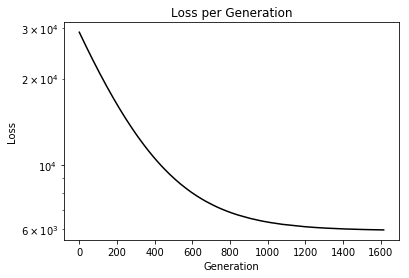

In [11]:
# Plot loss over time
plt.semilogy(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

## Optimization with stochastic gradient

We define the algorithm parameters: the batch size of the stochastioc gradient is n/10, then some convergence threshold and maximal number of iteration.

In [12]:
batch_size = n//10
max_iter = int(5e3)

We also intialize the tensorflow process.

In [13]:
## Initialize Tensorflow optimizer
init = tf.global_variables_initializer()
session.run(init)

In [14]:
loss_vec = []
for i in range(max_iter):
    rand_index = np.random.choice(n, size = batch_size)
    X_sub = data_X[rand_index,:]
    y_sub = data_y[rand_index]
    session.run(train_step,  feed_dict = {X: X_sub, y: y_sub})
    loss_ = session.run(l2_loss,  feed_dict = {X: X_sub, y: y_sub})
    loss_vec.append(loss_)
    if (i+1)%250==0:
        print('Step #' + str(i + 1), 'Loss = ' + str(loss_))

Step #250 Loss = 13196.016
Step #500 Loss = 9136.757
Step #750 Loss = 5453.1235
Step #1000 Loss = 4399.273
Step #1250 Loss = 8637.779
Step #1500 Loss = 5949.7803
Step #1750 Loss = 6472.353
Step #2000 Loss = 5073.4487
Step #2250 Loss = 6396.3184
Step #2500 Loss = 6266.03
Step #2750 Loss = 5616.3047
Step #3000 Loss = 6164.5703
Step #3250 Loss = 7876.1665
Step #3500 Loss = 6483.816
Step #3750 Loss = 6640.1553
Step #4000 Loss = 7554.5703
Step #4250 Loss = 4988.466
Step #4500 Loss = 8264.222
Step #4750 Loss = 4732.379
Step #5000 Loss = 6772.5435


In [15]:
print(session.run(beta))
print(session.run(mu))

[[ 0.16861208]
 [ 0.05302636]
 [ 0.4516306 ]
 [ 0.3152672 ]
 [ 0.18493353]
 [ 0.15921558]
 [-0.31653482]
 [ 0.35416198]
 [ 0.4484086 ]
 [ 0.2732467 ]]
[[151.695]]


And plot the loss function:

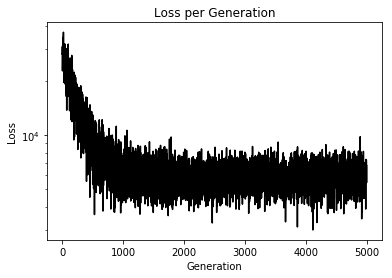

In [16]:
# Plot loss over time
plt.semilogy(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [17]:
session.close()